# Summary Time-Series Data Exploration

In [163]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### LASSO Regression Implementation for one city

In [164]:
def combine_city_data(city_code, dfs, names):
    """
    Generate a single DataFrame with data from all years for one city.
    """
    data_rows = [df.loc[city_code] for df in dfs]
    all_data = pd.concat(data_rows, axis=1)
    all_data.columns = names
    all_data.index.name = 'Year'
    return all_data
    

def import_training_data(filename):
    return pd.read_csv('../data/train/%s' % filename, index_col='UACE Code', dtype={'UACE Code': str})

In [165]:
city_info = pd.read_csv('../data/Cities.csv', index_col='UACE Code', dtype={'UACE Code': str})
columbus_code = city_info[city_info['Primary UZA Name'] == 'Columbus, OH'].index[0]
portland_code = city_info[city_info['Primary UZA Name'] == 'Portland, OR--WA'].index[0]
pittsburgh_code = city_info[city_info['Primary UZA Name'] == 'Pittsburgh, PA'].index[0]
boston_code = city_info[city_info['Primary UZA Name'] == 'Boston, MA--NH'].index[0]

city = boston_code

ynames = ['UPT_percap']#, 'PMT_percap', 'FARES_infladj_percap']
ydfs = [import_training_data('%s.csv' % name) for name in ynames]
city_yvals = combine_city_data(city, ydfs, ynames)


In [166]:
xnames = ['VRM_percap', 'VRH_percap', 'VOMS_percap', 'TotalFund_infladj_percap', 'FedFund_frac', 'StateFund_frac', 'LocalFund_frac', 'CapFund_infladj_percap', 'OpFund_infladj_percap', 'OpFund_frac', 'OpExp_Total_infladj_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac']
xdfs = [import_training_data('%s.csv' % name) for name in xnames]
city_xvals = combine_city_data(city, xdfs, xnames)
city_xvals

,VRM_percap,VRH_percap,VOMS_percap,TotalFund_infladj_percap,FedFund_frac,StateFund_frac,LocalFund_frac,CapFund_infladj_percap,OpFund_infladj_percap,OpFund_frac,OpExp_Total_infladj_percap,OpExp_GA_frac,OpExp_VM_frac,OpExp_VO_frac
Year,,,,,,,,,,,,,,
1991,14.690539,1.001728,0.000446,466.800601,0.102394,0.447088,0.301257,329.736017,329.736017,0.706374,243.487513,0.199419,0.181616,0.424445
1992,18.632080,1.222538,0.000522,533.282249,0.105519,0.397022,0.333920,361.256842,361.256842,0.677421,283.772993,0.198040,0.189556,0.411781
1993,18.815259,1.254746,0.000524,472.528148,0.092500,0.448980,0.267017,366.579897,366.579897,0.775784,279.912561,0.197783,0.190519,0.411039
1994,19.165734,1.175295,0.000551,461.117847,0.103952,0.388704,0.299606,338.154126,338.154126,0.733336,284.803299,0.165371,0.200840,0.443761
1995,20.102092,1.217249,0.000545,550.454307,0.169867,0.270470,0.390364,301.745664,301.745664,0.548176,247.639637,0.117640,0.203515,0.497509
1996,20.636985,1.320375,0.000560,559.154597,0.186948,0.255877,0.377297,302.874291,302.874291,0.541665,234.290352,0.170755,0.196713,0.456700
1997,21.697911,1.348760,0.000546,548.675974,0.230988,0.277988,0.313840,305.163906,305.163906,0.556182,237.144670,0.197567,0.188516,0.443377
1998,21.435004,1.323998,0.000570,483.104914,0.121904,0.330809,0.333790,317.528635,317.528635,0.657266,252.351764,0.216715,0.191320,0.438227
1999,22.431382,1.370133,0.000579,463.480248,0.117828,0.387326,0.250233,348.165048,348.165048,0.751197,275.566404,0.243111,0.188800,0.425293


Correlation Matrix below shows there is some multicollinearity going on. I think this explains why the lasso regression later on eliminates so many variables

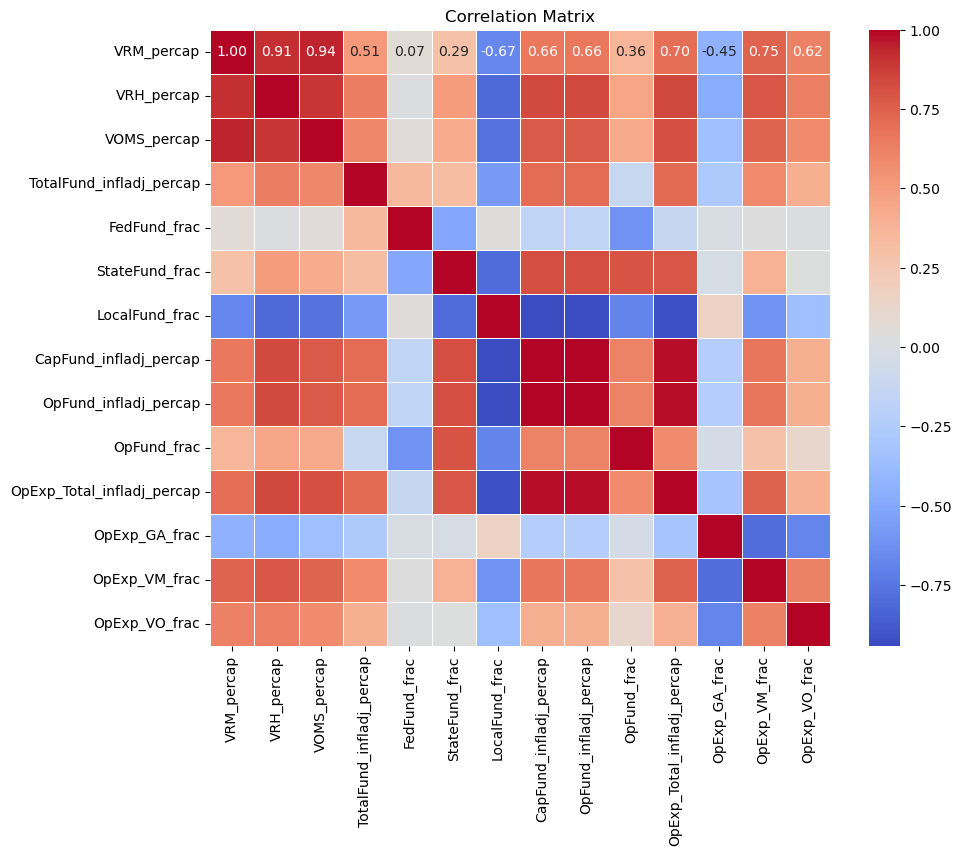

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = city_xvals.corr()
plt.figure(figsize=(10, 8))  # Adjust size as necessary
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Lasso implementation: First scale the data then use LassoCV which autocalculates the penalty parameter using cross-validation. 

The coefficients are printed and those with zeros indicate the variables aren't too important. However they depend on the city and difficult to interperate.

In [168]:
lasso_pipe = Pipeline([
    ('scale', StandardScaler()),  
    ('lasso', LassoCV(alphas=None, cv=5, max_iter=100000))  
])


y = city_yvals.values.ravel()
X = city_xvals.values


lasso_pipe.fit(X, y)


print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)


The LASSO Regression coefficients are:
[ 0.01713606  0.          1.08544599 -0.         -1.72271965  0.
 -0.          0.          0.          0.          0.         -0.
  1.66985929 -0.        ]


## All Cities 
### Find the most common features to keep

Here I decided to do all the cities and find the most common features that did not give zeros. 

It may be worth thinking about if we need to group features since they give different coefficients.

In [169]:

xnames = ['VRM_percap', 'VRH_percap', 'VOMS_percap', 'TotalFund_infladj_percap', 'FedFund_frac', 'StateFund_frac', 'LocalFund_frac', 'CapFund_infladj_percap', 'OpFund_infladj_percap', 'OpFund_frac', 'OpExp_Total_infladj_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac']
#xnames = ['VRM_percap', 'VRH_percap', 'VOMS_percap']
#xnames = ['TotalFund_infladj_percap', 'FedFund_frac', 'StateFund_frac', 'LocalFund_frac', 'CapFund_infladj_percap','OpFund_infladj_percap', 'OpFund_frac']
#xnames = ['OpExp_Total_infladj_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac']
coefficients_array = np.zeros((city_info.shape[0], len(xnames)))
for idx, (index, row) in enumerate(city_info.iterrows()):
    city = index

    ynames = ['UPT_percap']#, 'PMT_percap', 'FARES_infladj_percap']
    ydfs = [import_training_data('%s.csv' % name) for name in ynames]
    city_yvals = combine_city_data(city, ydfs, ynames)

    
    xdfs = [import_training_data('%s.csv' % name) for name in xnames]
    city_xvals = combine_city_data(city, xdfs, xnames)

    lasso_pipe = Pipeline([
    ('scale', StandardScaler()),  
    ('lasso', LassoCV(alphas=None, cv=5, max_iter=100000))  
    ])


    
    y = city_yvals.values.ravel()
    X = city_xvals.values
    mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)  # filter out nans
    X = X[mask]
    y = y[mask]

    
    if len(y) > 0 and X.shape[1] == len(xnames):  # make sure they aren't empty after filtering
        splits = 5 
        if len(y) > splits-1: # can't have less samples than splits
            lasso_pipe = Pipeline([
                ('scale', StandardScaler()),  
                ('lasso', LassoCV(alphas=None, cv=splits, max_iter=100000))  
            ])

            
            lasso_pipe.fit(X, y)

            
            coefficients_array[idx, :] = lasso_pipe.named_steps['lasso'].coef_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02171805016925532, tolerance: 0.011839131278612159
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03419575454401169, tolerance: 0.011839131278612159
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.923e-03, tolerance: 1.781e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/s

Prints how many times a feature had a zero. Unfortuntately out of 406 cities it seems there is no clear winning parameters ...

In [170]:
zero_counts = np.sum(coefficients_array == 0, axis=0)

feature_zero_counts = dict(zip(xnames, zero_counts))

sorted_items = list(feature_zero_counts.items())

for i in range(len(sorted_items)):
    for j in range(i + 1, len(sorted_items)):
        if sorted_items[i][1] > sorted_items[j][1]:
            sorted_items[i], sorted_items[j] = sorted_items[j], sorted_items[i]


for feature, count in sorted_items:
    print(f"Feature: {feature}, Zeros: {count} of {coefficients_array.shape[0]}")

Feature: OpExp_VM_frac, Zeros: 199 of 406
Feature: LocalFund_frac, Zeros: 201 of 406
Feature: VOMS_percap, Zeros: 219 of 406
Feature: VRM_percap, Zeros: 221 of 406
Feature: StateFund_frac, Zeros: 229 of 406
Feature: OpExp_VO_frac, Zeros: 236 of 406
Feature: OpExp_GA_frac, Zeros: 243 of 406
Feature: FedFund_frac, Zeros: 244 of 406
Feature: VRH_percap, Zeros: 244 of 406
Feature: CapFund_infladj_percap, Zeros: 263 of 406
Feature: OpFund_frac, Zeros: 272 of 406
Feature: OpExp_Total_infladj_percap, Zeros: 274 of 406
Feature: OpFund_infladj_percap, Zeros: 293 of 406
Feature: TotalFund_infladj_percap, Zeros: 293 of 406
